In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data_latinoamerica_paises = pd.read_csv("DatosFinalesFiltrado.csv", sep=',')
data_latinoamerica_paises

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
0,AR,2021-01-02,AR,Argentina,7767.000000,166.000000,1.670634e+06,46688.000000,20334.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,0.0,0.0
1,AR,2021-01-03,AR,Argentina,4934.000000,157.000000,1.675568e+06,46845.000000,20529.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,0.0,0.0
2,AR,2021-01-04,AR,Argentina,13953.000000,157.000000,1.689521e+06,47002.000000,25164.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,0.0,0.0
3,AR,2021-01-05,AR,Argentina,14085.000000,160.000000,1.703606e+06,47162.000000,29852.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,0.0,0.0
4,AR,2021-01-06,AR,Argentina,14496.000000,131.000000,1.718102e+06,47293.000000,34162.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3739,PE,2022-09-13,PE,Peru,1150.000000,22.000000,4.127612e+06,216173.000000,0.0,29381884.0,...,10554712.0,1256339.0,16425.0,76.516,146.370,84.815,63.9,12.6,0.0,0.0
3740,PE,2022-09-14,PE,Peru,7407.414516,185.096774,4.765656e+06,124442.124194,0.0,29381884.0,...,10554712.0,1256339.0,16425.0,76.516,146.370,84.815,63.9,12.6,0.0,0.0
3741,PE,2022-09-15,PE,Peru,7407.414516,185.096774,4.765656e+06,124442.124194,0.0,29381884.0,...,10554712.0,1256339.0,16425.0,76.516,146.370,84.815,63.9,12.6,0.0,0.0
3742,PE,2022-09-16,PE,Peru,7407.414516,185.096774,4.765656e+06,124442.124194,0.0,29381884.0,...,10554712.0,1256339.0,16425.0,76.516,146.370,84.815,63.9,12.6,0.0,0.0


In [4]:
data_latinoamerica_paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3744 non-null   float64
 5   new_deceased                           3744 non-null   float64
 6   cumulative_confirmed                   3744 non-null   float64
 7   cumulative_deceased                    3744 non-null   float64
 8   cumulative_vaccine_doses_administered  3744 non-null   float64
 9   population                             3744 non-null   float64
 10  population_male                        3744 non-null   float64
 11  popu

In [5]:
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])
data_latinoamerica_paises.set_index('date',inplace=True)
data_latinoamerica_paises

,location_key,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,population_male,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
date,,,,,,,,,,,,,,,,,,,,,
2021-01-02,AR,AR,Argentina,7767.000000,166.000000,1.670634e+06,46688.000000,20334.0,44938712.0,19523766.0,...,15057273.0,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,0.0,0.0
2021-01-03,AR,AR,Argentina,4934.000000,157.000000,1.675568e+06,46845.000000,20529.0,44938712.0,19523766.0,...,15057273.0,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,0.0,0.0
2021-01-04,AR,AR,Argentina,13953.000000,157.000000,1.689521e+06,47002.000000,25164.0,44938712.0,19523766.0,...,15057273.0,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,0.0,0.0
2021-01-05,AR,AR,Argentina,14085.000000,160.000000,1.703606e+06,47162.000000,29852.0,44938712.0,19523766.0,...,15057273.0,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,0.0,0.0
2021-01-06,AR,AR,Argentina,14496.000000,131.000000,1.718102e+06,47293.000000,34162.0,44938712.0,19523766.0,...,15057273.0,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-13,PE,PE,Peru,1150.000000,22.000000,4.127612e+06,216173.000000,0.0,29381884.0,14450757.0,...,10554712.0,1256339.0,16425.0,76.516,146.370,84.815,63.9,12.6,0.0,0.0
2022-09-14,PE,PE,Peru,7407.414516,185.096774,4.765656e+06,124442.124194,0.0,29381884.0,14450757.0,...,10554712.0,1256339.0,16425.0,76.516,146.370,84.815,63.9,12.6,0.0,0.0
2022-09-15,PE,PE,Peru,7407.414516,185.096774,4.765656e+06,124442.124194,0.0,29381884.0,14450757.0,...,10554712.0,1256339.0,16425.0,76.516,146.370,84.815,63.9,12.6,0.0,0.0


In [6]:
data_latinoamerica_paises['Week'] = data_latinoamerica_paises.index.isocalendar().week
data_latinoamerica_paises

,location_key,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,population_male,...,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered,Week
date,,,,,,,,,,,,,,,,,,,,,
2021-01-02,AR,AR,Argentina,7767.000000,166.000000,1.670634e+06,46688.000000,20334.0,44938712.0,19523766.0,...,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,0.0,0.0,53
2021-01-03,AR,AR,Argentina,4934.000000,157.000000,1.675568e+06,46845.000000,20529.0,44938712.0,19523766.0,...,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,0.0,0.0,53
2021-01-04,AR,AR,Argentina,13953.000000,157.000000,1.689521e+06,47002.000000,25164.0,44938712.0,19523766.0,...,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,0.0,0.0,1
2021-01-05,AR,AR,Argentina,14085.000000,160.000000,1.703606e+06,47162.000000,29852.0,44938712.0,19523766.0,...,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,0.0,0.0,1
2021-01-06,AR,AR,Argentina,14496.000000,131.000000,1.718102e+06,47293.000000,34162.0,44938712.0,19523766.0,...,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-13,PE,PE,Peru,1150.000000,22.000000,4.127612e+06,216173.000000,0.0,29381884.0,14450757.0,...,1256339.0,16425.0,76.516,146.370,84.815,63.9,12.6,0.0,0.0,37
2022-09-14,PE,PE,Peru,7407.414516,185.096774,4.765656e+06,124442.124194,0.0,29381884.0,14450757.0,...,1256339.0,16425.0,76.516,146.370,84.815,63.9,12.6,0.0,0.0,37
2022-09-15,PE,PE,Peru,7407.414516,185.096774,4.765656e+06,124442.124194,0.0,29381884.0,14450757.0,...,1256339.0,16425.0,76.516,146.370,84.815,63.9,12.6,0.0,0.0,37


In [7]:
data_latinoamerica_paises_2021 = data_latinoamerica_paises.loc[
    (data_latinoamerica_paises.index >= '2021-01-01') &
    (data_latinoamerica_paises.index <= '2021-12-31')
]
data_latinoamerica_paises_2021

,location_key,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,population_male,...,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered,Week
date,,,,,,,,,,,,,,,,,,,,,
2021-01-02,AR,AR,Argentina,7767.0,166.0,1670634.0,46688.0,20334.0,44938712.0,19523766.0,...,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,0.0,0.0,53
2021-01-03,AR,AR,Argentina,4934.0,157.0,1675568.0,46845.0,20529.0,44938712.0,19523766.0,...,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,0.0,0.0,53
2021-01-04,AR,AR,Argentina,13953.0,157.0,1689521.0,47002.0,25164.0,44938712.0,19523766.0,...,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,0.0,0.0,1
2021-01-05,AR,AR,Argentina,14085.0,160.0,1703606.0,47162.0,29852.0,44938712.0,19523766.0,...,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,0.0,0.0,1
2021-01-06,AR,AR,Argentina,14496.0,131.0,1718102.0,47293.0,34162.0,44938712.0,19523766.0,...,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,PE,PE,Peru,3261.0,29.0,2285854.0,202515.0,50186253.0,29381884.0,14450757.0,...,1256339.0,16425.0,76.516,146.370,84.815,63.9,12.6,0.0,0.0,52
2021-12-28,PE,PE,Peru,4270.0,37.0,2290124.0,202552.0,50515554.0,29381884.0,14450757.0,...,1256339.0,16425.0,76.516,146.370,84.815,63.9,12.6,0.0,0.0,52
2021-12-29,PE,PE,Peru,4340.0,40.0,2294464.0,202592.0,50800766.0,29381884.0,14450757.0,...,1256339.0,16425.0,76.516,146.370,84.815,63.9,12.6,0.0,0.0,52


In [8]:
weekly_cases = data_latinoamerica_paises_2021.groupby(['country_name', 'Week'])[['new_confirmed','new_deceased']].sum().reset_index()
weekly_cases

,country_name,Week,new_confirmed,new_deceased
0,Argentina,1,85321.0,1093.0
1,Argentina,2,76129.0,1191.0
2,Argentina,3,66250.0,1321.0
3,Argentina,4,58524.0,1199.0
4,Argentina,5,50576.0,1112.0
...,...,...,...,...
313,Peru,49,10004.0,272.0
314,Peru,50,10637.0,265.0
315,Peru,51,11306.0,257.0
316,Peru,52,21381.0,188.0


In [9]:
weekly_cases['country_name'].unique()

array(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru'],
      dtype=object)

In [10]:
import warnings
warnings.filterwarnings("ignore")

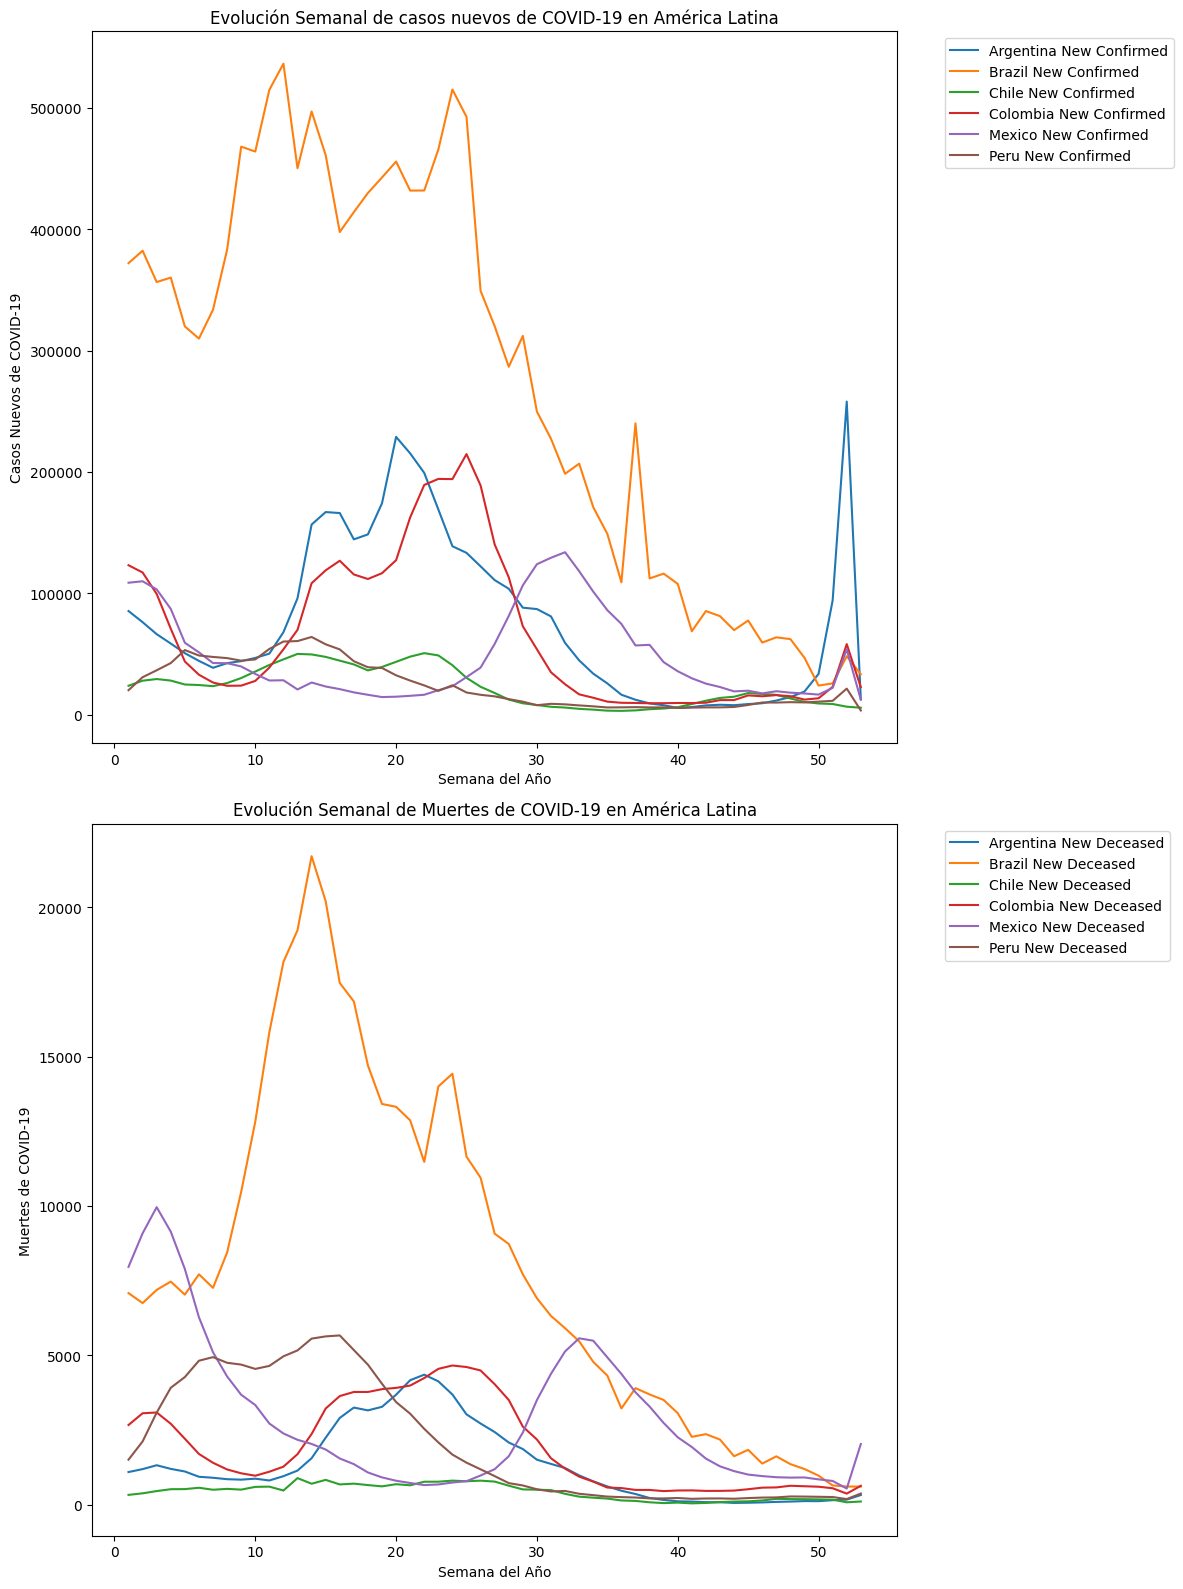

In [11]:
weekly_cases = data_latinoamerica_paises_2021.groupby(['country_name', 'Week'])[['new_confirmed','new_deceased']].sum().reset_index()

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 16))
for country in weekly_cases['country_name'].unique():
    country_weekely_cases = weekly_cases[weekly_cases['country_name'] == country]
    ax[0].plot(country_weekely_cases['Week'], country_weekely_cases['new_confirmed'], label=f'{country} New Confirmed')
    ax[1].plot(country_weekely_cases['Week'], country_weekely_cases['new_deceased'], label=f'{country} New Deceased')

ax[0].set_xlabel("Semana del Año")
ax[0].set_ylabel("Casos Nuevos de COVID-19")
ax[0].set_title("Evolución Semanal de casos nuevos de COVID-19 en América Latina")
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax[1].set_xlabel("Semana del Año")
ax[1].set_ylabel("Muertes de COVID-19")
ax[1].set_title("Evolución Semanal de Muertes de COVID-19 en América Latina")
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

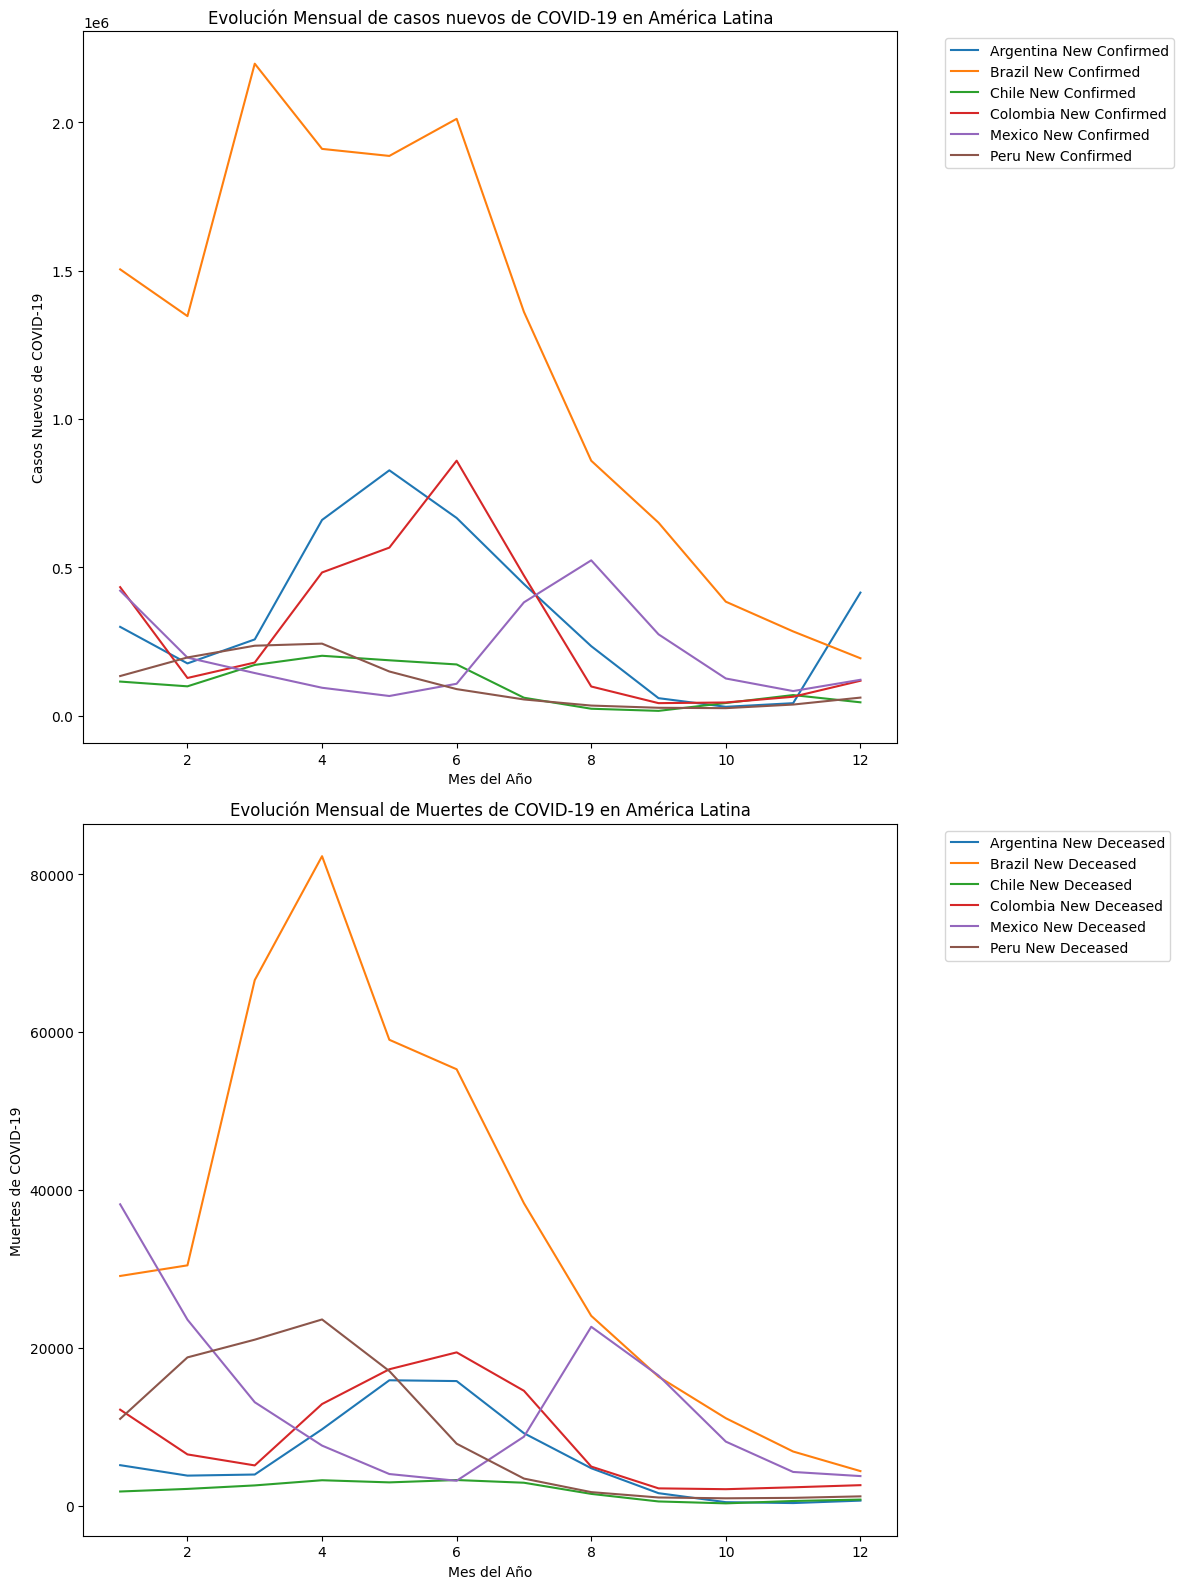

In [12]:
data_latinoamerica_paises_2021['month'] = data_latinoamerica_paises_2021.index.month
yearly_cases = data_latinoamerica_paises_2021.groupby(['country_name', 'month'])[['new_confirmed','new_deceased']].sum().reset_index()

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 16))
for country in yearly_cases['country_name'].unique():
    country_yearly_cases = yearly_cases[yearly_cases['country_name'] == country]
    ax[0].plot(country_yearly_cases['month'], country_yearly_cases['new_confirmed'], label=f'{country} New Confirmed')
    ax[1].plot(country_yearly_cases['month'], country_yearly_cases['new_deceased'], label=f'{country} New Deceased')

ax[0].set_xlabel("Mes del Año")
ax[0].set_ylabel("Casos Nuevos de COVID-19")
ax[0].set_title("Evolución Mensual de casos nuevos de COVID-19 en América Latina")
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax[1].set_xlabel("Mes del Año")
ax[1].set_ylabel("Muertes de COVID-19")
ax[1].set_title("Evolución Mensual de Muertes de COVID-19 en América Latina")
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [13]:
data_latinoamerica_paises

,location_key,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,population_male,...,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered,Week
date,,,,,,,,,,,,,,,,,,,,,
2021-01-02,AR,AR,Argentina,7767.000000,166.000000,1.670634e+06,46688.000000,20334.0,44938712.0,19523766.0,...,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,0.0,0.0,53
2021-01-03,AR,AR,Argentina,4934.000000,157.000000,1.675568e+06,46845.000000,20529.0,44938712.0,19523766.0,...,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,0.0,0.0,53
2021-01-04,AR,AR,Argentina,13953.000000,157.000000,1.689521e+06,47002.000000,25164.0,44938712.0,19523766.0,...,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,0.0,0.0,1
2021-01-05,AR,AR,Argentina,14085.000000,160.000000,1.703606e+06,47162.000000,29852.0,44938712.0,19523766.0,...,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,0.0,0.0,1
2021-01-06,AR,AR,Argentina,14496.000000,131.000000,1.718102e+06,47293.000000,34162.0,44938712.0,19523766.0,...,2690269.0,55032.0,76.520,147.086,79.483,26.6,15.8,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-13,PE,PE,Peru,1150.000000,22.000000,4.127612e+06,216173.000000,0.0,29381884.0,14450757.0,...,1256339.0,16425.0,76.516,146.370,84.815,63.9,12.6,0.0,0.0,37
2022-09-14,PE,PE,Peru,7407.414516,185.096774,4.765656e+06,124442.124194,0.0,29381884.0,14450757.0,...,1256339.0,16425.0,76.516,146.370,84.815,63.9,12.6,0.0,0.0,37
2022-09-15,PE,PE,Peru,7407.414516,185.096774,4.765656e+06,124442.124194,0.0,29381884.0,14450757.0,...,1256339.0,16425.0,76.516,146.370,84.815,63.9,12.6,0.0,0.0,37


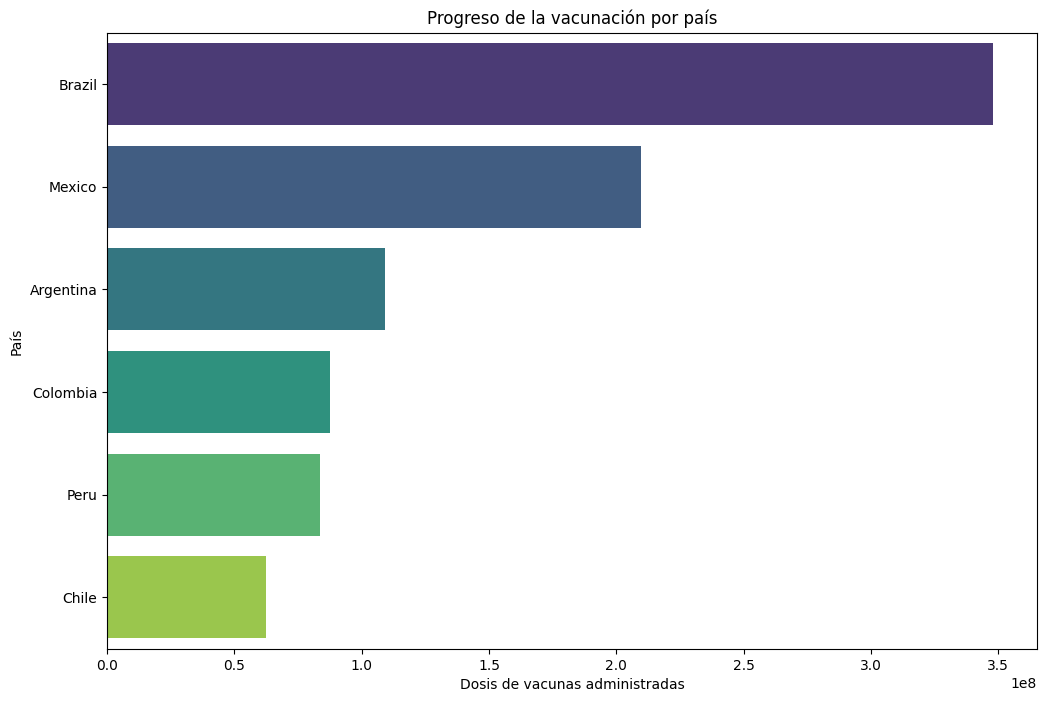

In [14]:
vaccination_data = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=vaccination_data.values, y=vaccination_data.index, hue=vaccination_data.index, palette='viridis')
plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('País')
plt.title('Progreso de la vacunación por país')

plt.show()

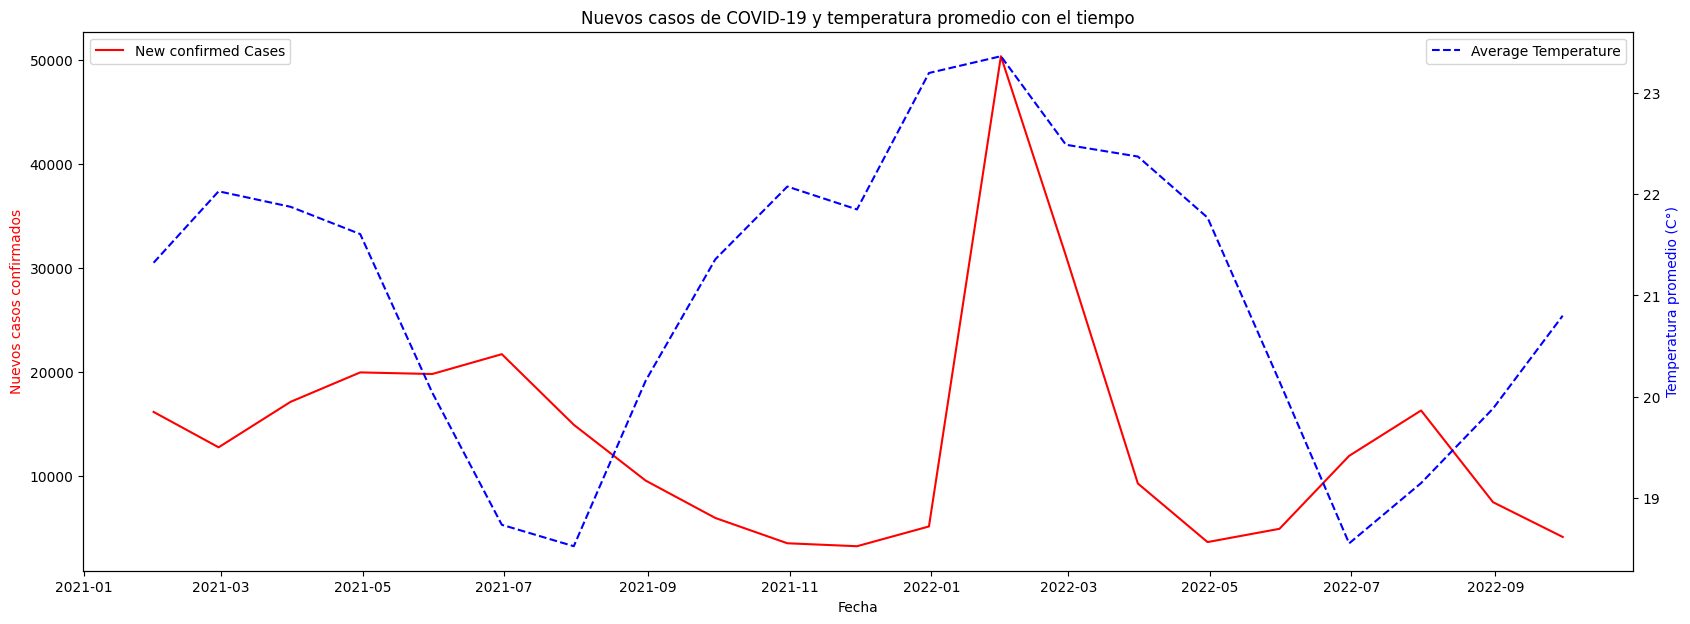

In [15]:
plt.figure(figsize=(20, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(data_latinoamerica_paises.resample('ME').mean(numeric_only=True).index, data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['new_confirmed'], color='red', label='New confirmed Cases')
ax2.plot(data_latinoamerica_paises.resample('ME').mean(numeric_only=True).index, data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['average_temperature_celsius'], color='blue', label='Average Temperature', linestyle='--')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos casos confirmados', color='red')
ax2.set_ylabel('Temperatura promedio (C°)', color='blue')
plt.title('Nuevos casos de COVID-19 y temperatura promedio con el tiempo')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


In [17]:
data_latinoamerica_paises.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

In [18]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [19]:
data_latinoamerica_paises[["population","population_urban","cumulative_confirmed"]]


,population,population_urban,cumulative_confirmed
date,,,
2021-01-02,44938712.00,41339571.00,1670634.00
2021-01-03,44938712.00,41339571.00,1675568.00
2021-01-04,44938712.00,41339571.00,1689521.00
2021-01-05,44938712.00,41339571.00,1703606.00
2021-01-06,44938712.00,41339571.00,1718102.00
...,...,...,...
2022-09-13,29381884.00,25390339.00,4127612.00
2022-09-14,29381884.00,25390339.00,4765656.10
2022-09-15,29381884.00,25390339.00,4765656.10


In [20]:
data_latinoamerica_paises['urban_population_percentage'] = data_latinoamerica_paises['population_urban'] / data_latinoamerica_paises['population']
data_latinoamerica_paises['confirmed_population_percentage'] = data_latinoamerica_paises['cumulative_confirmed'] / data_latinoamerica_paises['population']
urban_cases = data_latinoamerica_paises.groupby('country_name').last().sort_values(by='urban_population_percentage')
urban_cases

,location_key,country_code,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,...,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered,Week,urban_population_percentage,confirmed_population_percentage
country_name,,,,,,,,,,,,,,,,,,,,,
Colombia,CO,CO,7407.41,185.10,4765656.10,124442.12,0.00,50882884.00,24984564.00,25898320.00,...,77.11,151.62,78.00,37.00,15.80,0.00,0.00,37,0.80,0.09
Brazil,BR,BR,7407.41,185.10,4765656.10,124442.12,0.00,212559409.00,104435783.00,108123626.00,...,75.67,188.53,91.42,29.90,16.60,0.00,0.00,37,0.86,0.02
Peru,PE,PE,7407.41,185.10,4765656.10,124442.12,0.00,29381884.00,14450757.00,14931127.00,...,76.52,146.37,84.81,63.90,12.60,0.00,0.00,37,0.86,0.16
Argentina,AR,AR,7407.41,185.10,4765656.10,124442.12,0.00,44938712.00,19523766.00,20593330.00,...,76.52,147.09,79.48,26.60,15.80,0.00,0.00,37,0.92,0.11
Mexico,MX,MX,7407.41,185.10,4765656.10,124442.12,0.00,110991953.00,54855231.00,57481307.00,...,74.99,184.38,95.81,36.70,15.70,0.00,0.00,37,0.92,0.04
Chile,CL,CL,7407.41,185.10,4765656.10,124442.12,0.00,17574003.00,8972014.00,8601989.00,...,80.04,107.67,59.03,25.30,12.40,0.00,0.00,37,0.95,0.27


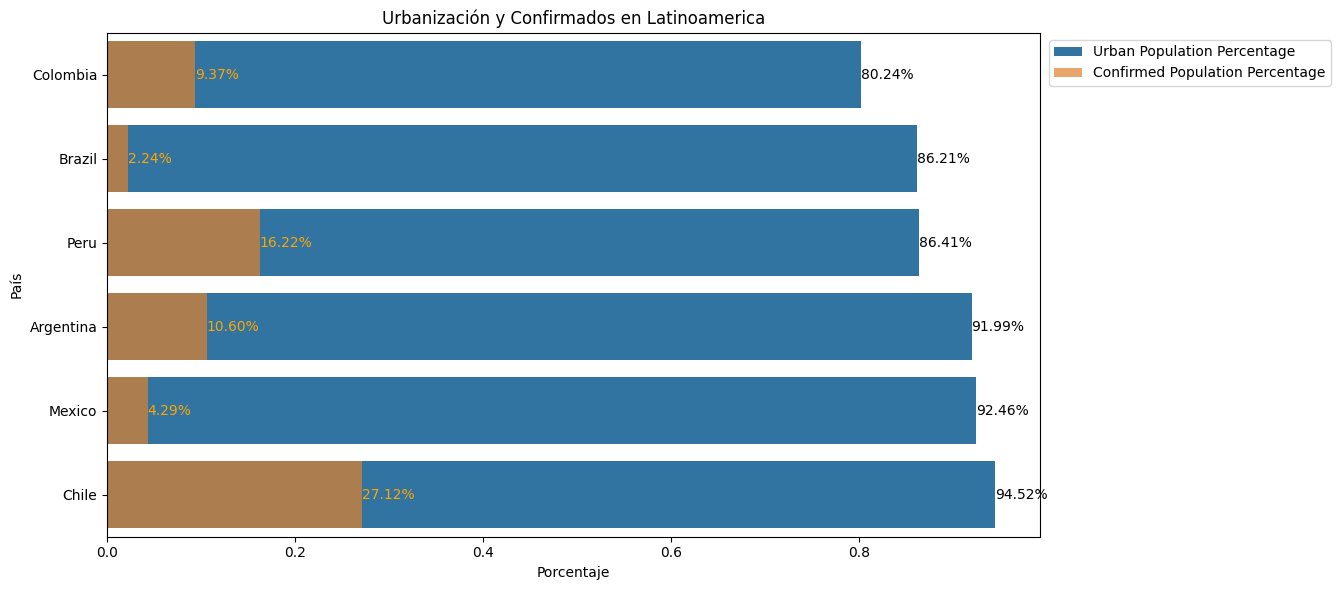

In [21]:
data_latinoamerica_paises['urban_population_percentage'] = data_latinoamerica_paises['population_urban'] / data_latinoamerica_paises['population']
data_latinoamerica_paises['confirmed_population_percentage'] = data_latinoamerica_paises['cumulative_confirmed'] / data_latinoamerica_paises['population']
urban_cases = data_latinoamerica_paises.groupby('country_name').last().sort_values(by='urban_population_percentage')

plt.figure(figsize=(14, 6))
ax = sns.barplot(x='urban_population_percentage', y=urban_cases.index, data=urban_cases, label='Urban Population Percentage')

# Añadir etiquetas a cada barra para urban_population_percentage
for index, value in enumerate(urban_cases['urban_population_percentage']):
    ax.text(value, index, f'{value*100:.2f}%', color='black', ha="left", va="center")

# Superponer la segunda barra para confirmed_population_percentage
ax2 = sns.barplot(x='confirmed_population_percentage', y=urban_cases.index, data=urban_cases, alpha=0.7, label='Confirmed Population Percentage')

# Añadir etiquetas a cada barra para confirmed_population_percentage
for index, value in enumerate(urban_cases['confirmed_population_percentage']):
    ax2.text(value, index, f'{value*100:.2f}%', color='orange', ha="left", va="center")

plt.xlabel('Porcentaje')
plt.ylabel('País')
plt.title('Urbanización y Confirmados en Latinoamerica')
plt.legend(bbox_to_anchor=(1.32, 1), loc="upper right")
plt.tight_layout()
plt.show()

El pais con mayor impacto en la propagación fue chile, aunque es extraño ya que chile fue uno de los paises que mejor manejó la pandemia, sin embargo esto puede ser debido a la densidad de población en chile.

In [22]:
data_latinoamerica_paises['deceased_percentage'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population']
data_latinoamerica_paises

,location_key,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,population_male,...,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered,Week,urban_population_percentage,confirmed_population_percentage,deceased_percentage
date,,,,,,,,,,,,,,,,,,,,,
2021-01-02,AR,AR,Argentina,7767.00,166.00,1670634.00,46688.00,20334.00,44938712.00,19523766.00,...,147.09,79.48,26.60,15.80,0.00,0.00,53,0.92,0.04,0.00
2021-01-03,AR,AR,Argentina,4934.00,157.00,1675568.00,46845.00,20529.00,44938712.00,19523766.00,...,147.09,79.48,26.60,15.80,0.00,0.00,53,0.92,0.04,0.00
2021-01-04,AR,AR,Argentina,13953.00,157.00,1689521.00,47002.00,25164.00,44938712.00,19523766.00,...,147.09,79.48,26.60,15.80,0.00,0.00,1,0.92,0.04,0.00
2021-01-05,AR,AR,Argentina,14085.00,160.00,1703606.00,47162.00,29852.00,44938712.00,19523766.00,...,147.09,79.48,26.60,15.80,0.00,0.00,1,0.92,0.04,0.00
2021-01-06,AR,AR,Argentina,14496.00,131.00,1718102.00,47293.00,34162.00,44938712.00,19523766.00,...,147.09,79.48,26.60,15.80,0.00,0.00,1,0.92,0.04,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-13,PE,PE,Peru,1150.00,22.00,4127612.00,216173.00,0.00,29381884.00,14450757.00,...,146.37,84.81,63.90,12.60,0.00,0.00,37,0.86,0.14,0.01
2022-09-14,PE,PE,Peru,7407.41,185.10,4765656.10,124442.12,0.00,29381884.00,14450757.00,...,146.37,84.81,63.90,12.60,0.00,0.00,37,0.86,0.16,0.00
2022-09-15,PE,PE,Peru,7407.41,185.10,4765656.10,124442.12,0.00,29381884.00,14450757.00,...,146.37,84.81,63.90,12.60,0.00,0.00,37,0.86,0.16,0.00


In [23]:
high_mortality_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().sort_values(ascending=False).head(5).index
high_mortality_countries

Index(['Peru', 'Chile', 'Brazil', 'Colombia', 'Argentina'], dtype='object', name='country_name')

In [24]:
data_latinoamerica_paises.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

In [25]:
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
data_latinoamerica_paises[age_groups]

,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older
date,,,,,,,,,
2021-01-02,6718871.00,7045513.00,6430658.00,5777148.00,4507125.00,3911943.00,2914251.00,1817557.00,994030.00
2021-01-03,6718871.00,7045513.00,6430658.00,5777148.00,4507125.00,3911943.00,2914251.00,1817557.00,994030.00
2021-01-04,6718871.00,7045513.00,6430658.00,5777148.00,4507125.00,3911943.00,2914251.00,1817557.00,994030.00
2021-01-05,6718871.00,7045513.00,6430658.00,5777148.00,4507125.00,3911943.00,2914251.00,1817557.00,994030.00
2021-01-06,6718871.00,7045513.00,6430658.00,5777148.00,4507125.00,3911943.00,2914251.00,1817557.00,994030.00
...,...,...,...,...,...,...,...,...,...
2022-09-13,5140624.00,5035905.00,4895056.00,4379777.00,3660378.00,2772568.00,1846407.00,1078066.00,573103.00
2022-09-14,5140624.00,5035905.00,4895056.00,4379777.00,3660378.00,2772568.00,1846407.00,1078066.00,573103.00
2022-09-15,5140624.00,5035905.00,4895056.00,4379777.00,3660378.00,2772568.00,1846407.00,1078066.00,573103.00


In [26]:
age_distribution = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()
age_distribution

,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older
country_name,,,,,,,,,
Argentina,6718871.00,7045513.00,6430658.00,5777148.00,4507125.00,3911943.00,2914251.00,1817557.00,994030.00
Brazil,29076910.00,31160446.00,34104643.00,34476762.00,29462006.00,24421202.00,16896862.00,8801551.00,4159027.00
Chile,2428079.00,2493879.00,2995538.00,2945404.00,2578404.00,2352271.00,1791787.00,993126.00,537721.00
Colombia,7414155.00,8119876.00,8847061.00,7810299.00,6450787.00,5543980.00,3771358.00,1979761.00,945607.00
Peru,5140624.00,5035905.00,4895056.00,4379777.00,3660378.00,2772568.00,1846407.00,1078066.00,573103.00


In [27]:
age_distribution_arg = age_distribution[age_distribution.index == 'Argentina']
age_distribution_arg

,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older
country_name,,,,,,,,,
Argentina,6718871.00,7045513.00,6430658.00,5777148.00,4507125.00,3911943.00,2914251.00,1817557.00,994030.00


In [28]:
age_distribution.index.unique()

Index(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Peru'], dtype='object', name='country_name')

In [29]:
age_distribution_arg.loc["Argentina"]

population_age_00_09          6718871.00
population_age_10_19          7045513.00
population_age_20_29          6430658.00
population_age_30_39          5777148.00
population_age_40_49          4507125.00
population_age_50_59          3911943.00
population_age_60_69          2914251.00
population_age_70_79          1817557.00
population_age_80_and_older    994030.00
Name: Argentina, dtype: float64

In [30]:
age_distribution.loc["Argentina"].index

Index(['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older'],
      dtype='object')

In [31]:
age_distribution.loc["Argentina"].values

array([6718871., 7045513., 6430658., 5777148., 4507125., 3911943.,
       2914251., 1817557.,  994030.])

In [32]:
age_distribution_arg.index

Index(['Argentina'], dtype='object', name='country_name')

In [33]:
age_distribution_arg.columns

Index(['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older'],
      dtype='object')

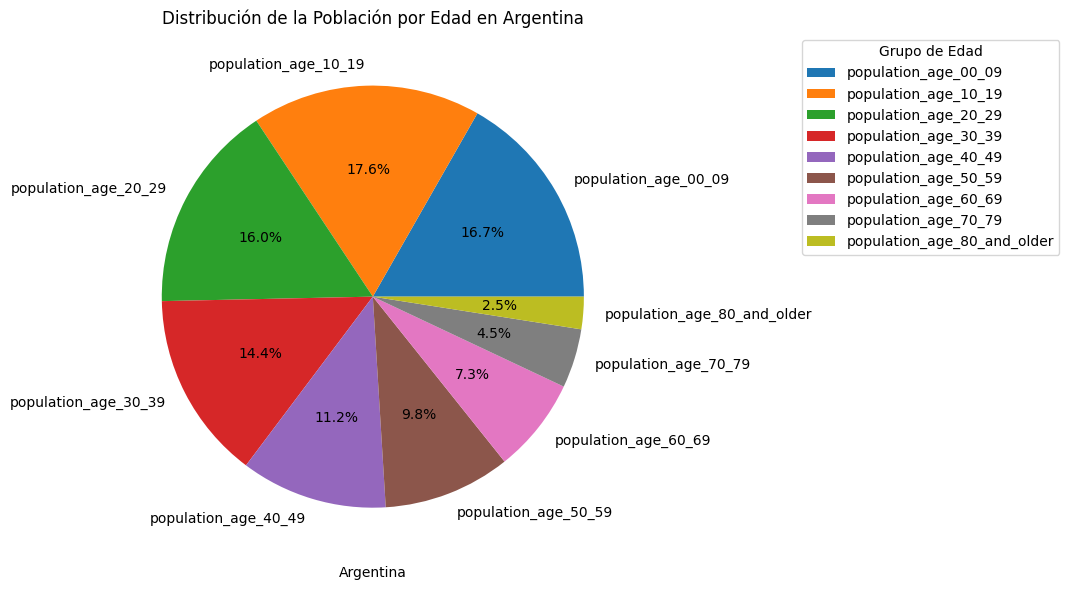

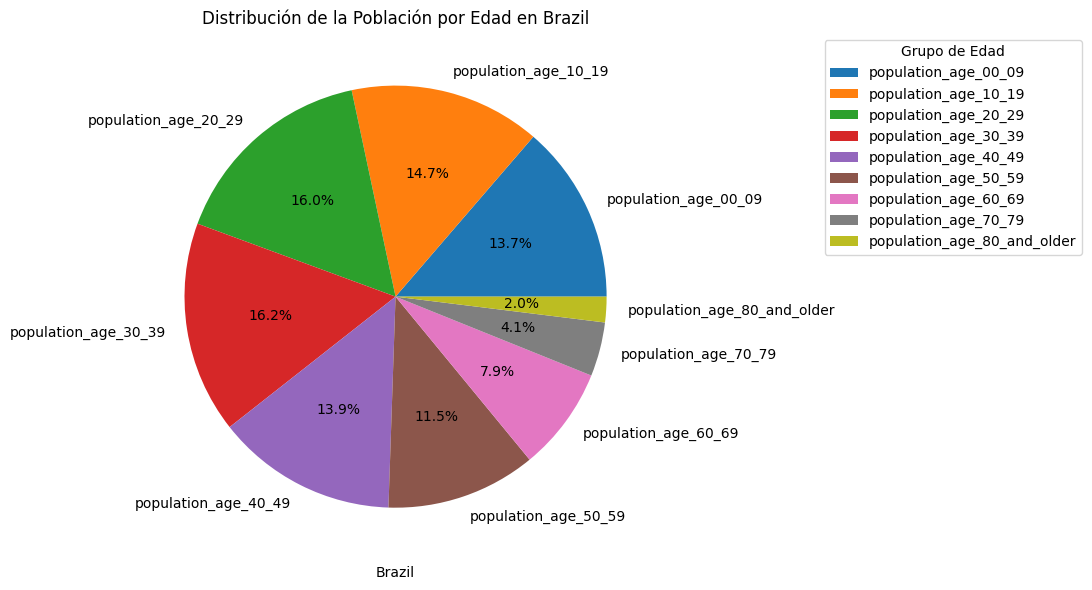

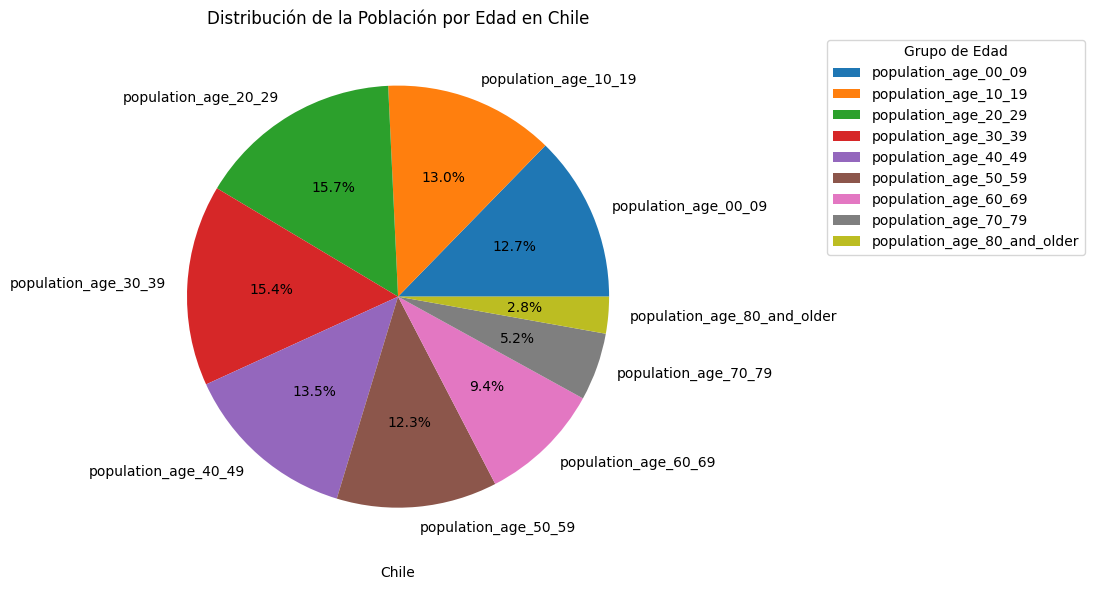

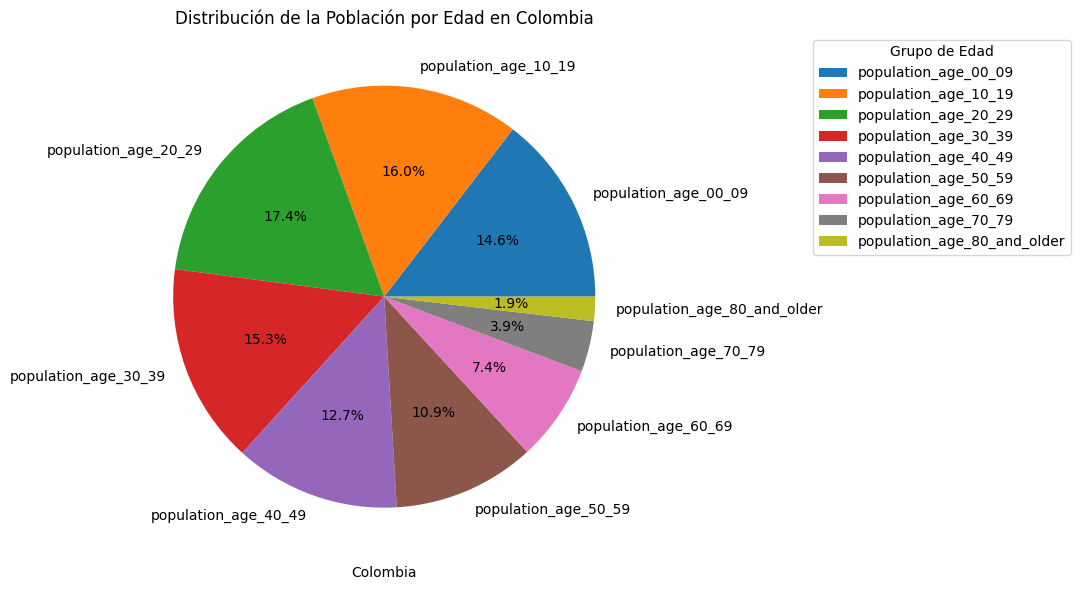

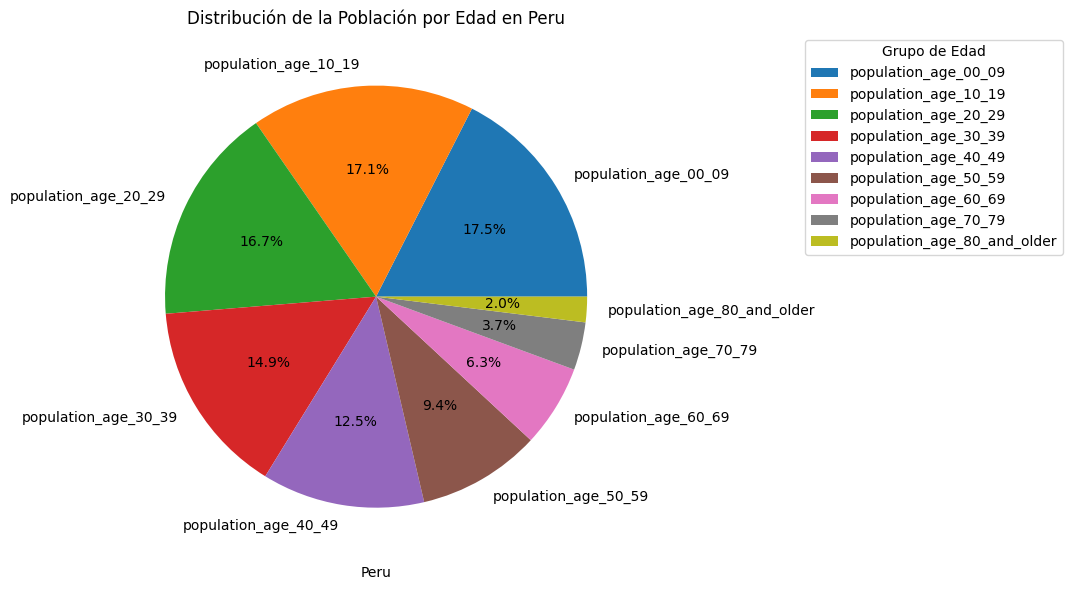

In [34]:
high_mortality_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().sort_values(ascending=False).head(5).index
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()
paises = age_distribution.index.unique()

for pais in paises:
    plt.figure(figsize=(12,6))
    plt.pie(
        age_distribution.loc[pais].values,
        labels=age_distribution.loc[pais].index,
        autopct='%1.1f%%'
    )

    # age_distribution.plot(kind='pie', stacked=True, figsize=(12, 8))
    plt.xlabel(f'{pais}')
    plt.title(f'Distribución de la Población por Edad en {pais}')
    plt.legend(bbox_to_anchor=(1.3, 1), loc='upper left', title='Grupo de Edad')
    plt.tight_layout()
    plt.show()

La visualización evidencia la disparidad en la distribución poblacional por grupos de edad en los países seleccionados, aunque no arroje demasiados detalles específicos. Aún así, es útil

Podemos, sin embargo, comenzar a explorar cómo de efectivas o no fueron las estrategias de vacunación para reducir tanto la mortalidad como los casos confirmados.

- Comparación de estrategias de vacunación

In [35]:
data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max()

country_name
Argentina   109204825.00
Brazil      347868481.00
Chile        62204235.00
Colombia     87566541.00
Mexico      209673612.00
Peru         83624934.00
Name: cumulative_vaccine_doses_administered, dtype: float64

In [36]:
data_latinoamerica_paises.groupby('country_name')['population'].mean()

country_name
Argentina    44938712.00
Brazil      212559409.00
Chile        17574003.00
Colombia     50882884.00
Mexico      110991953.00
Peru         29381884.00
Name: population, dtype: float64

In [37]:
data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_paises.groupby('country_name')['population'].mean()

country_name
Argentina   2.43
Brazil      1.64
Chile       3.54
Colombia    1.72
Mexico      1.89
Peru        2.85
dtype: float64

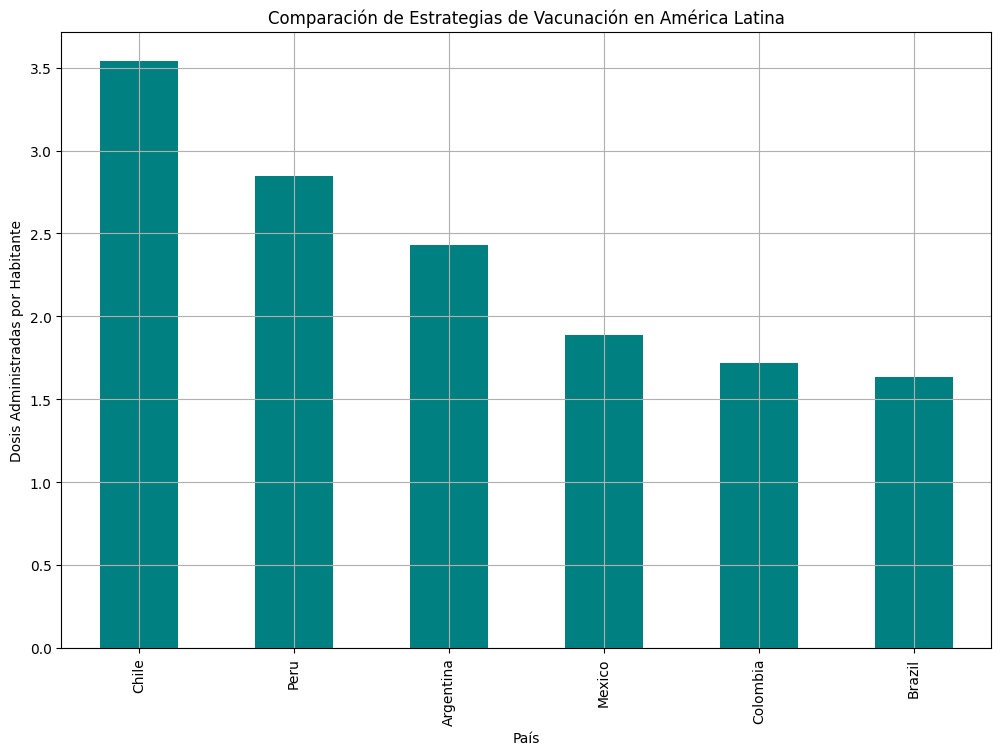

In [38]:
vaccination_strategy = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_paises.groupby('country_name')['population'].mean()
vaccination_strategy.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), color='teal', grid=True)

plt.xlabel('País')
plt.ylabel('Dosis Administradas por Habitante')
plt.title('Comparación de Estrategias de Vacunación en América Latina')
plt.show()

Nuevamente observamos el éxito de las políticas en Chile y una clara deficiencia en Colombia y Brasil.

Con estos datos, podemos identificar los países que requieren mayor apoyo y dónde sería más efectivo establecer nuevos centros de ayuda.

Anteriormente analizamos la diabetes, pero sería útil examinarla en porcentajes para identificar mejor a cada país.

- Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad

In [39]:
data_latinoamerica_paises.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

In [40]:
top_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nlargest(3).index
top_countries

Index(['Peru', 'Chile', 'Brazil'], dtype='object', name='country_name')

In [41]:
bottom_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nsmallest(3).index # 5 paises con menor cantidad de muertes
bottom_countries

Index(['Mexico', 'Argentina', 'Colombia'], dtype='object', name='country_name')

In [42]:
all_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().sort_values(ascending=False) # 5 paises con menor cantidad de muertes
all_countries

country_name
Peru        0.01
Chile       0.01
Brazil      0.00
Colombia    0.00
Argentina   0.00
Mexico      0.00
Name: deceased_percentage, dtype: float64

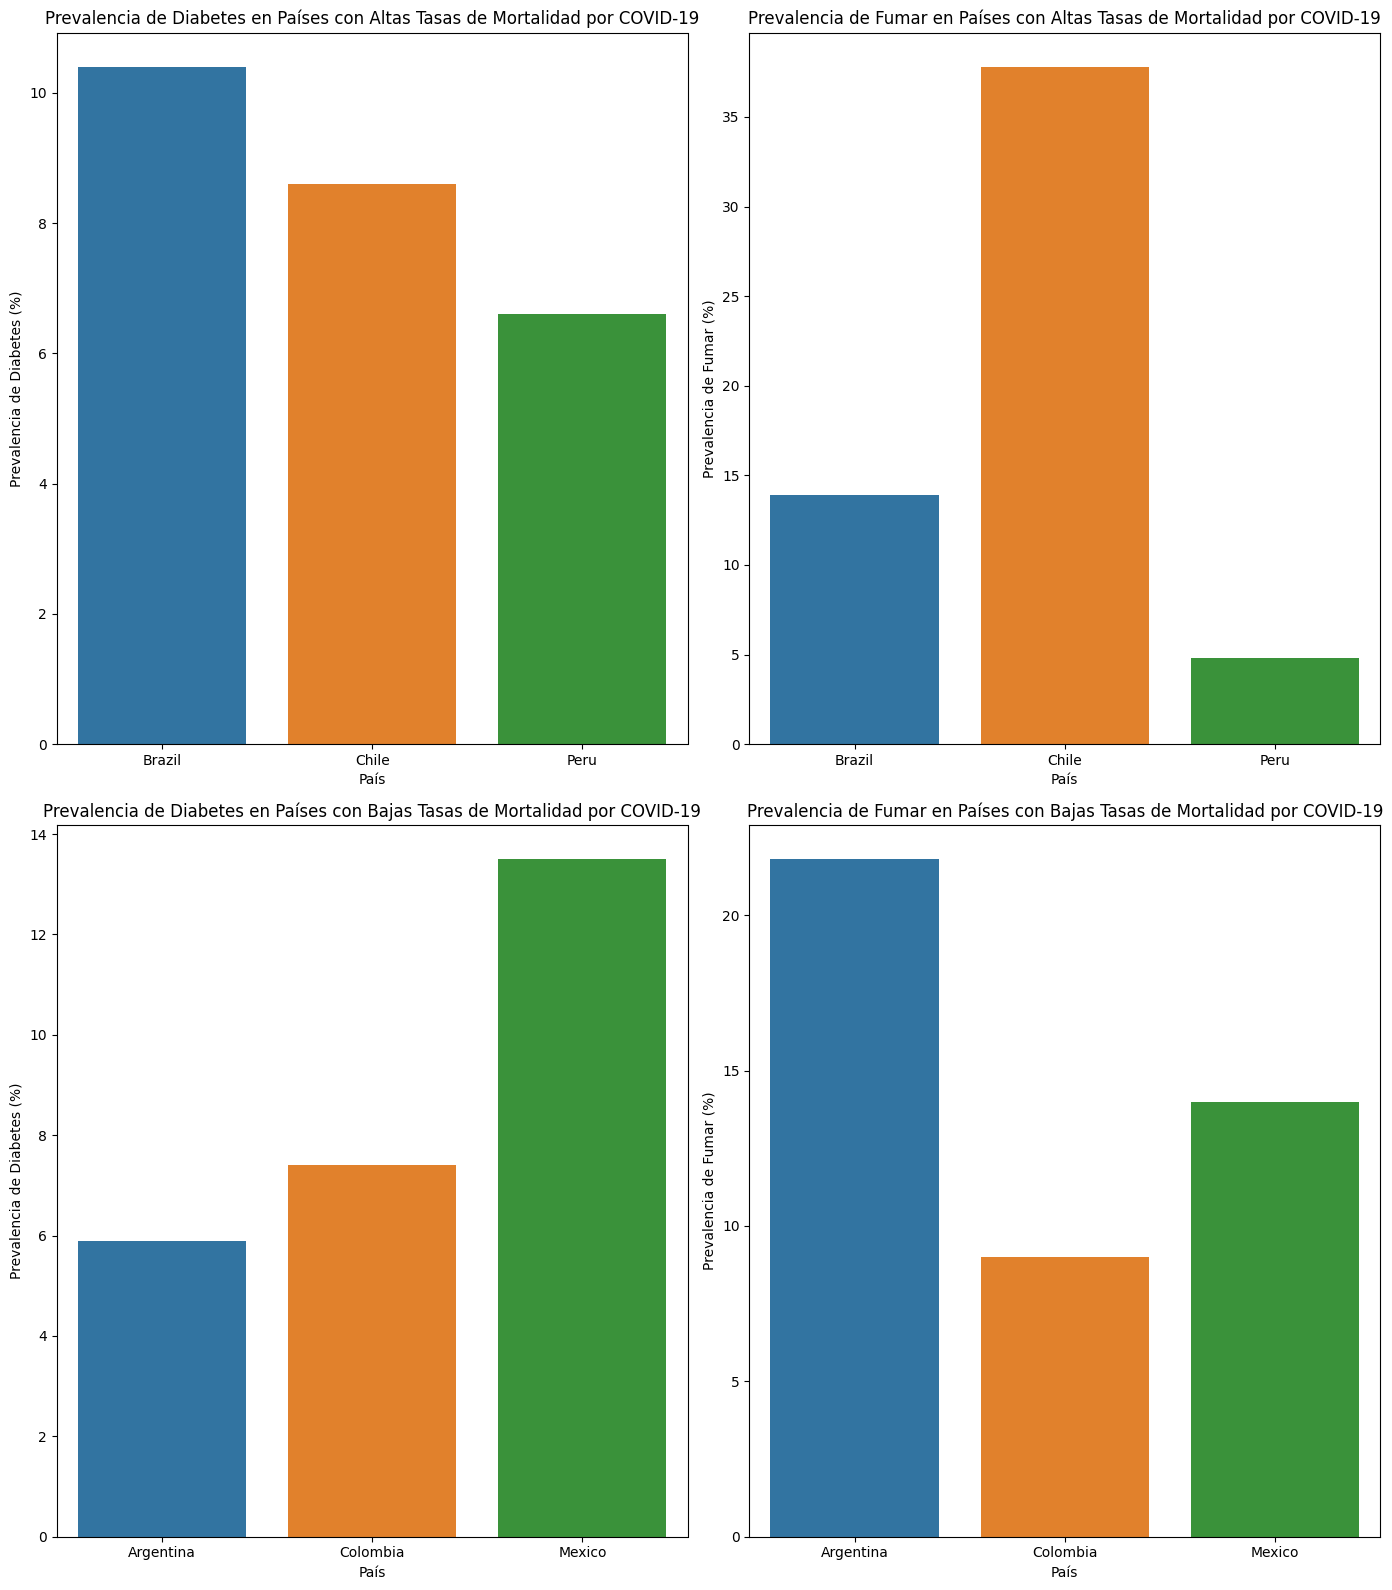

In [43]:
top_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nlargest(3).index # 5 paises con mayor cantidad de muertes
bottom_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nsmallest(3).index # 5 paises con menor cantidad de muertes

conditions_top_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(top_countries)]
conditions_bottom_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(bottom_countries)]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    ncols=2,
    nrows=2,
    figsize=(14, 16)
)

# Prevalencia de diabetes en top
sns.barplot(data=conditions_top_data, x='country_name', y='diabetes_prevalence', hue='country_name', ax=ax1)
ax1.set_xlabel('País')
ax1.set_ylabel('Prevalencia de Diabetes (%)')
ax1.set_title('Prevalencia de Diabetes en Países con Altas Tasas de Mortalidad por COVID-19')

# Prevalencia de fumar en top
sns.barplot(data=conditions_top_data, x='country_name', y='smoking_prevalence', hue='country_name', ax=ax2)
ax2.set_xlabel('País')
ax2.set_ylabel('Prevalencia de Fumar (%)')
ax2.set_title('Prevalencia de Fumar en Países con Altas Tasas de Mortalidad por COVID-19')

# Prevalencia de diabetes en top
sns.barplot(data=conditions_bottom_data, x='country_name', y='diabetes_prevalence', hue='country_name', ax=ax3)
ax3.set_xlabel('País')
ax3.set_ylabel('Prevalencia de Diabetes (%)')
ax3.set_title('Prevalencia de Diabetes en Países con Bajas Tasas de Mortalidad por COVID-19')

# Prevalencia de fumar en top
sns.barplot(data=conditions_bottom_data, x='country_name', y='smoking_prevalence', hue='country_name', ax=ax4)
ax4.set_xlabel('País')
ax4.set_ylabel('Prevalencia de Fumar (%)')
ax4.set_title('Prevalencia de Fumar en Países con Bajas Tasas de Mortalidad por COVID-19')

plt.tight_layout()

plt.show()

Ahora identificamos que la diabetes afecta en mayor medida a México y Brasil, por lo que podríamos decir que estos países han experimentado un impacto significativo debido a esta condición. En cuanto al consumo de tabaco, se observa que afecta más a Chile y Argentina, lo que sugiere que estos países han sido los más afectados por el tabaquismo.

Sin embargo, mientras Brasil se encuentra entre los países con una tasa de mortalidad elevada, México se ubica entre los más bajos. La misma situación ocurre entre Chile (alta) y Argentina (baja).

Por tanto, es difícil establecer una compensación clara entre condiciones preexistentes y la mortalidad por Covid-19.

A partir de esto, ¿cómo ha sido la tasa de letalidad en cada país?

- Fatalidad por país

In [44]:
data_latinoamerica_paises['case_fatality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed'] # Otro indice de fatalidad posible. Muertos sobre contagiados. 
fatality_rates = data_latinoamerica_paises.groupby('country_name')['case_fatality_rate'].last().sort_values()
fatality_rates

country_name
Argentina   0.03
Brazil      0.03
Chile       0.03
Colombia    0.03
Mexico      0.03
Peru        0.03
Name: case_fatality_rate, dtype: float64

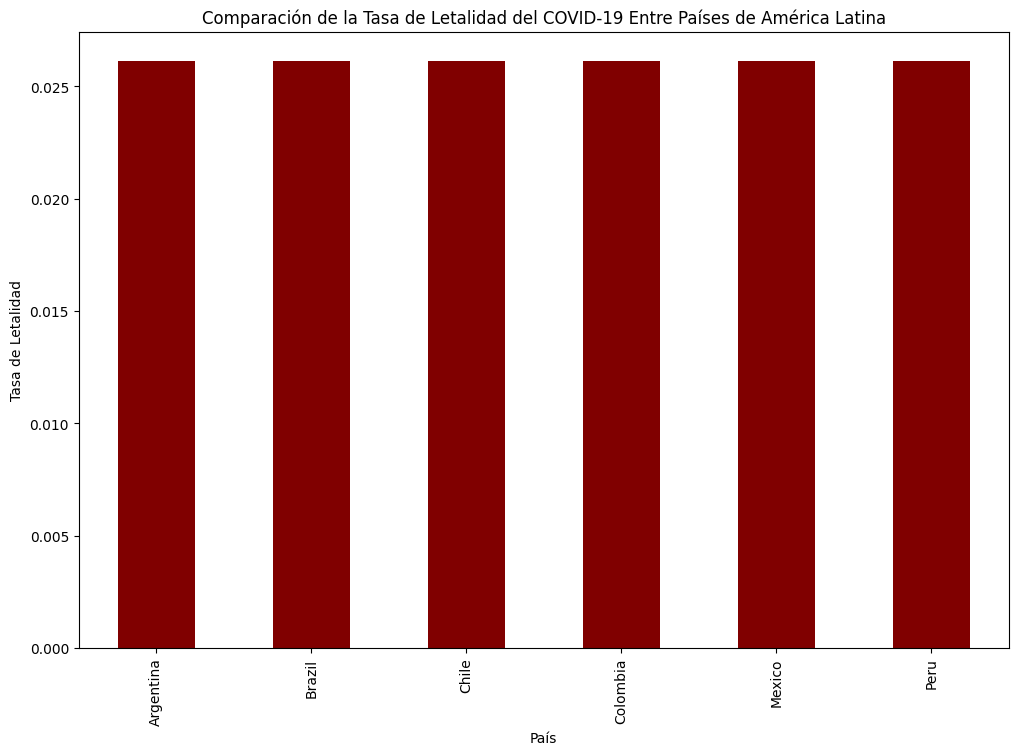

In [45]:

data_latinoamerica_paises['case_fatality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']
fatality_rates = data_latinoamerica_paises.groupby('country_name')['case_fatality_rate'].last().sort_values()

plt.figure(figsize=(12, 8))
fatality_rates.plot(kind='bar', color='maroon')
plt.xlabel('País')
plt.ylabel('Tasa de Letalidad')
plt.title('Comparación de la Tasa de Letalidad del COVID-19 Entre Países de América Latina')
plt.show()

Todos los países han mostrado un patrón similar en términos de letalidad; Sin embargo, al analizar las demás gráficas, se observa una disminución en este indicador.

Los nuevos casos y las nuevas muertes han variado de la siguiente manera, influenciados por la vacunación y las medidas implementadas en cada país. Además, se ha logrado reducir el número de personas contagiosas y fallecidas.

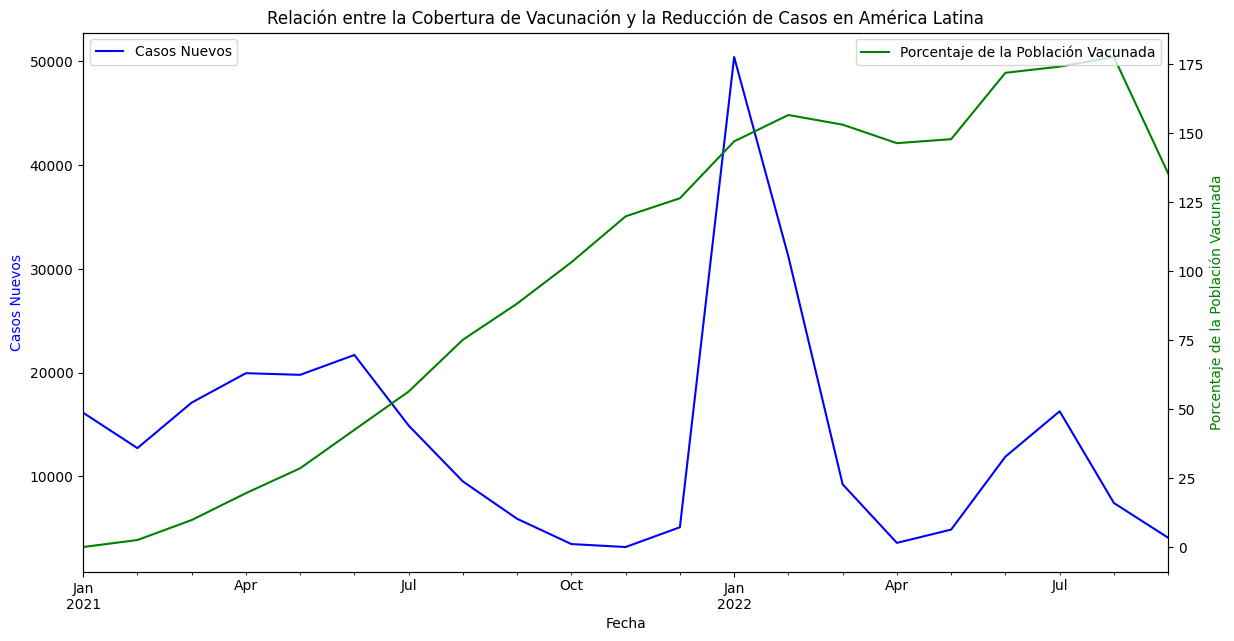

In [46]:
plt.figure(figsize=(14, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()

#crea percentajes de vacunacion
data_latinoamerica_paises['percentage_vaccinated'] = data_latinoamerica_paises['cumulative_vaccine_doses_administered'] / data_latinoamerica_paises['population'] * 100

# Gráfico mis dos lineplots
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='green', label='Porcentaje de la Población Vacunada')


ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos Nuevos', color='blue')
ax2.set_ylabel('Porcentaje de la Población Vacunada', color='green')
ax1.set_title('Relación entre la Cobertura de Vacunación y la Reducción de Casos en América Latina')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

In [47]:
data_latinoamerica_paises.reset_index(inplace=True)

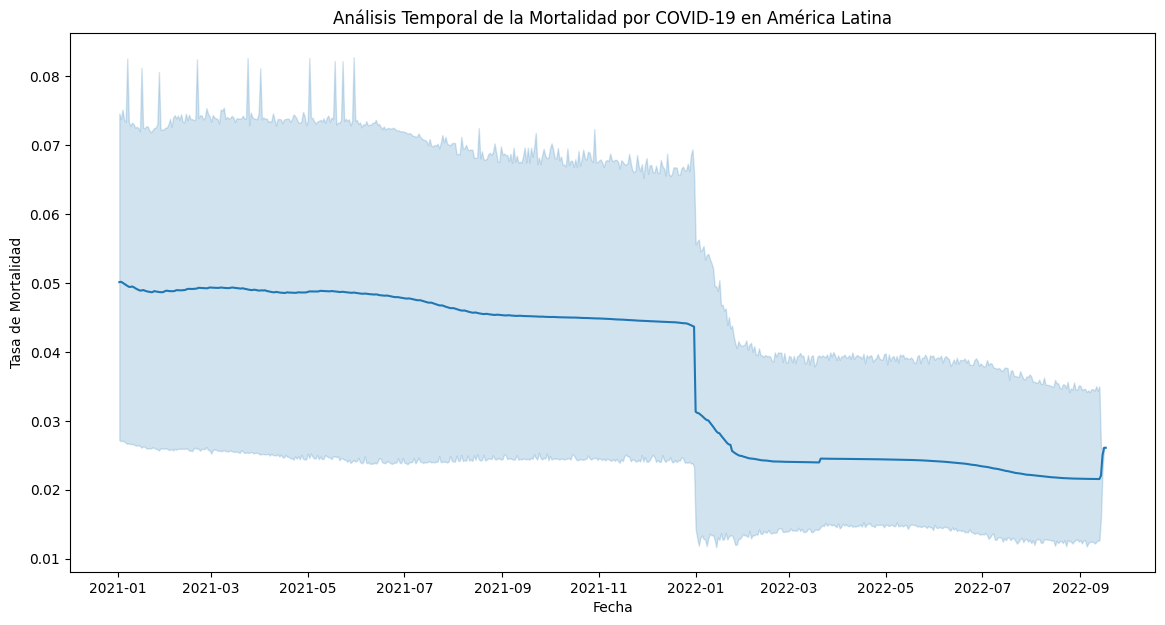

In [48]:
data_latinoamerica_paises['mortality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=data_latinoamerica_paises, 
    x='date', 
    y='mortality_rate', 
    estimator='mean'
)
plt.title('Análisis Temporal de la Mortalidad por COVID-19 en América Latina')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad')
plt.show()

In [53]:
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])

In [54]:
data_latinoamerica_paises.reset_index(inplace=True)

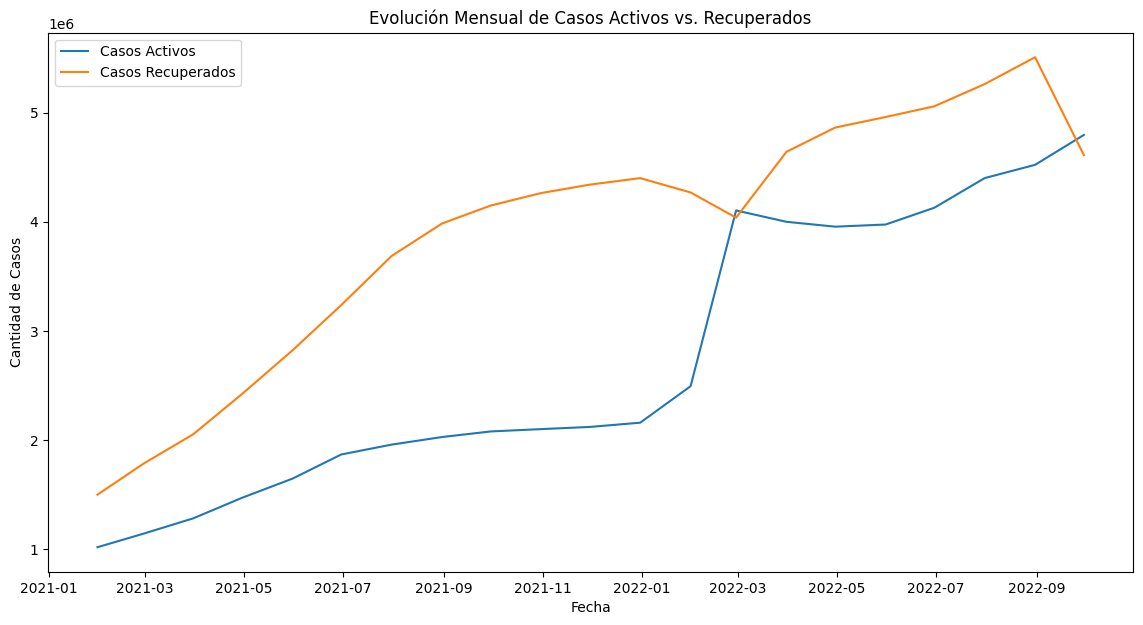

In [56]:

data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])
data_latinoamerica_paises.set_index('date', inplace=True)

# Ahora puedes aplicar el resample y graficar
plt.figure(figsize=(14, 7))
sns.lineplot(data=data_latinoamerica_paises.resample('M').mean(numeric_only=True), x='date', y='active_cases', label='Casos Activos')
sns.lineplot(data=data_latinoamerica_paises.resample('M').mean(numeric_only=True), x='date', y='cumulative_recovered', label='Casos Recuperados')

plt.xlabel('Fecha')
plt.ylabel('Cantidad de Casos')
plt.title('Evolución Mensual de Casos Activos vs. Recuperados')
plt.legend()
plt.show()


In [57]:
current_situation = data_latinoamerica_paises.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].last().sort_values(by="active_cases")
current_situation

,active_cases,cumulative_recovered,cumulative_deceased
country_name,,,
Argentina,4641213.98,0.00,124442.12
Brazil,4641213.98,0.00,124442.12
Chile,4641213.98,0.00,124442.12
Colombia,4641213.98,0.00,124442.12
Mexico,4641213.98,0.00,124442.12
Peru,4641213.98,0.00,124442.12


In [58]:
# Debo usar max() porque last no registra el acumulado de recovered
current_situation = data_latinoamerica_paises.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].max().sort_values(by="active_cases")
current_situation

,active_cases,cumulative_recovered,cumulative_deceased
country_name,,,
Chile,4641213.98,0.00,124442.12
Mexico,4641213.98,0.00,304025.00
Peru,4641213.98,0.00,216173.00
Colombia,6162609.00,5441021.00,155770.00
Argentina,9567933.00,0.00,129830.00
Brazil,33819307.00,33706231.00,685203.00


In [59]:
data_latinoamerica_paises[['country_name','active_cases', 'cumulative_recovered', 'cumulative_deceased']].loc[
    (data_latinoamerica_paises.index >= data_latinoamerica_paises.index.max())
]

,country_name,active_cases,cumulative_recovered,cumulative_deceased
date,,,,
2022-09-17,Argentina,4641213.98,0.00,124442.12
2022-09-17,Brazil,4641213.98,0.00,124442.12
2022-09-17,Chile,4641213.98,0.00,124442.12
2022-09-17,Colombia,4641213.98,0.00,124442.12
2022-09-17,Mexico,4641213.98,0.00,124442.12
2022-09-17,Peru,4641213.98,0.00,124442.12


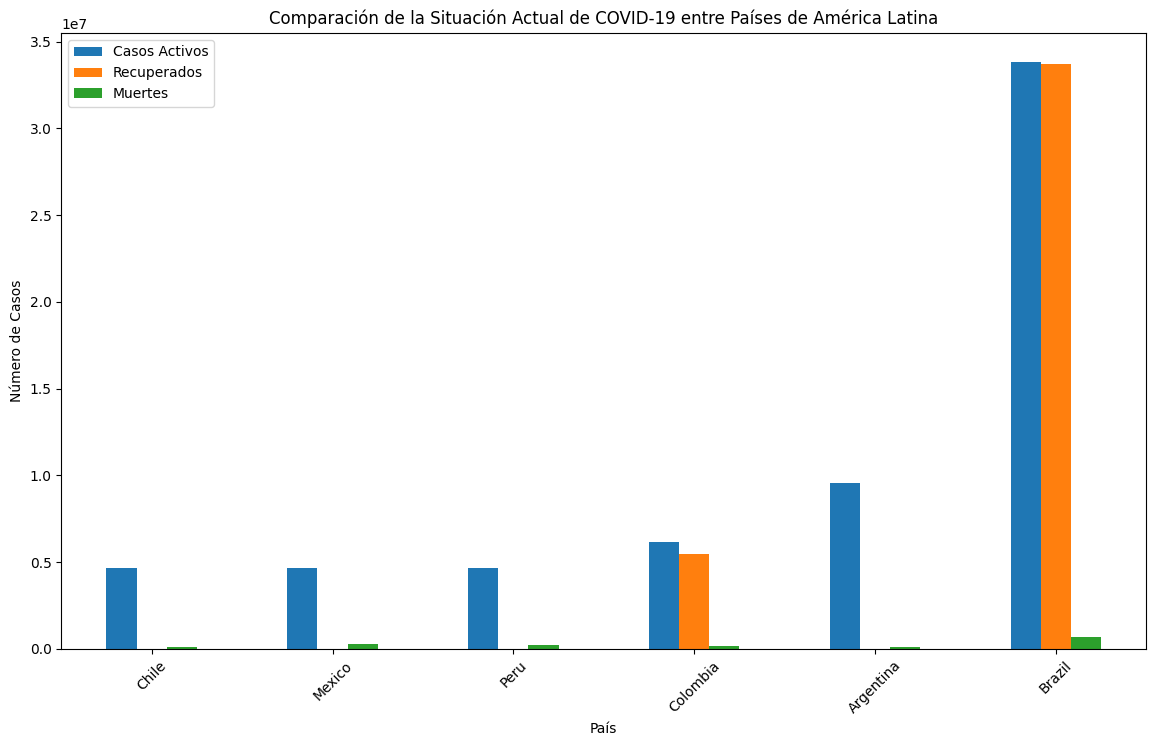

In [60]:
current_situation = data_latinoamerica_paises.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].max().sort_values(by="active_cases")
current_situation.plot(kind='bar', stacked=False, figsize=(14, 8))
plt.title('Comparación de la Situación Actual de COVID-19 entre Países de América Latina')
plt.xlabel('País')
plt.ylabel('Número de Casos')
plt.legend(['Casos Activos', 'Recuperados', 'Muertes'])
plt.xticks(rotation=45)
plt.show()